# Multi-dimensional Data Analysis with Xarray

## Introduction

## Learning Objectives

## Understanding Xarray's Data Model

### Core Data Structures

### Why This Structure Matters

## Setting Up Your Environment

### Installing Required Packages

In [1]:
%pip install xarray pooch pygis

Note: you may need to restart the kernel to use updated packages.


### Importing Libraries and Configuration

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Configure Xarray for better display and performance
xr.set_options(keep_attrs=True, display_expand_data=False)

# Configure NumPy display for cleaner output
np.set_printoptions(threshold=10, edgeitems=2)

# Configure matplotlib for better plots
plt.rcParams["figure.dpi"] = 150

## Loading and Exploring Real Climate Data

### Loading Tutorial Data

In [3]:
# Load a climate dataset with air temperature measurements
ds = xr.tutorial.open_dataset("air_temperature")
ds

<xarray.Dataset> Size: 31MB
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

## Working with DataArrays

### Accessing DataArrays from Datasets

In [4]:
# Extract the air temperature DataArray using dictionary notation
temperature = ds["air"]
temperature

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)> Size: 31MB
[3869000 values with dtype=float64]
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [5]:
# Same result using attribute access
temperature = ds.air
temperature

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)> Size: 31MB
[3869000 values with dtype=float64]
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

### Exploring DataArray Components

In [6]:
# Examine the actual data values (a NumPy array)
print("Data shape:", temperature.values.shape)
print("Data type:", temperature.values.dtype)
print("First few values:", temperature.values.flat[:5])

Data shape: (2920, 25, 53)
Data type: float64
First few values: [241.2 242.5 243.5 244.  244.1]


In [7]:
# Understand the dimension structure
print("Dimensions:", temperature.dims)
print("Dimension sizes:", temperature.sizes)

Dimensions: ('time', 'lat', 'lon')
Dimension sizes: Frozen({'time': 2920, 'lat': 25, 'lon': 53})


In [8]:
# Explore the coordinate information
print("Coordinates:")
for name, coord in temperature.coords.items():
    print(f"  {name}: {coord.values[:3]}... (showing first 3 values)")

Coordinates:
  lat: [75.  72.5 70. ]... (showing first 3 values)
  lon: [200.  202.5 205. ]... (showing first 3 values)
  time: ['2013-01-01T00:00:00.000000000' '2013-01-01T06:00:00.000000000'
 '2013-01-01T12:00:00.000000000']... (showing first 3 values)


In [9]:
# Examine metadata attributes
print("Attributes:")
for key, value in temperature.attrs.items():
    print(f"  {key}: {value}")

Attributes:
  long_name: 4xDaily Air temperature at sigma level 995
  units: degK
  precision: 2
  GRIB_id: 11
  GRIB_name: TMP
  var_desc: Air temperature
  dataset: NMC Reanalysis
  level_desc: Surface
  statistic: Individual Obs
  parent_stat: Other
  actual_range: [185.16 322.1 ]


## Intuitive Data Selection and Indexing

### Label-Based Selection

In [10]:
# Select data for a specific date and location
point_data = temperature.sel(time="2013-01-01", lat=40.0, lon=260.0)
point_data

<xarray.DataArray 'air' (time: 4)> Size: 32B
array([265.2, 266.2, 262.4, 267.5])
Coordinates:
    lat      float32 4B 40.0
    lon      float32 4B 260.0
  * time     (time) datetime64[ns] 32B 2013-01-01 ... 2013-01-01T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

### Time Range Selection

In [11]:
# Select all data for January 2013
january_data = temperature.sel(time=slice("2013-01-01", "2013-01-31"))
print(f"January 2013 data shape: {january_data.shape}")
print(f"Time range: {january_data.time.values[0]} to {january_data.time.values[-1]}")

January 2013 data shape: (124, 25, 53)
Time range: 2013-01-01T00:00:00.000000000 to 2013-01-31T18:00:00.000000000


### Nearest Neighbor Selection

In [12]:
# Select data nearest to a location that might not be exactly on the grid
nearest_data = temperature.sel(lat=40.5, lon=255.7, method="nearest")
actual_coords = nearest_data.sel(time="2013-01-01")
print(f"Requested: lat=40.5, lon=255.7")
print(f"Actual: lat={actual_coords.lat.values}, lon={actual_coords.lon.values}")

Requested: lat=40.5, lon=255.7
Actual: lat=40.0, lon=255.0


## Performing Operations on Multi-Dimensional Data

### Statistical Operations Across Dimensions

In [13]:
# Calculate the temporal mean (average temperature at each location)
mean_temperature = temperature.mean(dim="time")
print(f"Original data shape: {temperature.shape}")
print(f"Time-averaged data shape: {mean_temperature.shape}")
print(
    f"Temperature range: {mean_temperature.min().values:.1f} to {mean_temperature.max().values:.1f} K"
)

Original data shape: (2920, 25, 53)
Time-averaged data shape: (25, 53)
Temperature range: 249.1 to 301.6 K


### Computing Anomalies

In [14]:
# Calculate temperature anomalies by subtracting the time mean from each time step
anomalies = temperature - mean_temperature
print(f"Anomaly range: {anomalies.min().values:.1f} to {anomalies.max().values:.1f} K")

# Find the location and time of the largest positive anomaly
max_anomaly = anomalies.max()
max_location = anomalies.where(anomalies == max_anomaly, drop=True)
print(f"Largest positive anomaly: {max_anomaly.values:.1f} K")

Anomaly range: -42.1 to 39.9 K
Largest positive anomaly: 39.9 K


### Spatial Statistics

In [15]:
# Calculate area-weighted spatial mean for each time step
spatial_mean = temperature.mean(dim=["lat", "lon"])
print(f"Spatial mean temperature time series shape: {spatial_mean.shape}")

# Find the warmest and coldest time periods
warmest_date = spatial_mean.time[spatial_mean.argmax()]
coldest_date = spatial_mean.time[spatial_mean.argmin()]
print(f"Warmest period: {warmest_date.values}")
print(f"Coldest period: {coldest_date.values}")

Spatial mean temperature time series shape: (2920,)
Warmest period: 2013-08-12T00:00:00.000000000
Coldest period: 2014-02-12T12:00:00.000000000


## Data Visualization with Xarray

### Plotting 2D Spatial Data

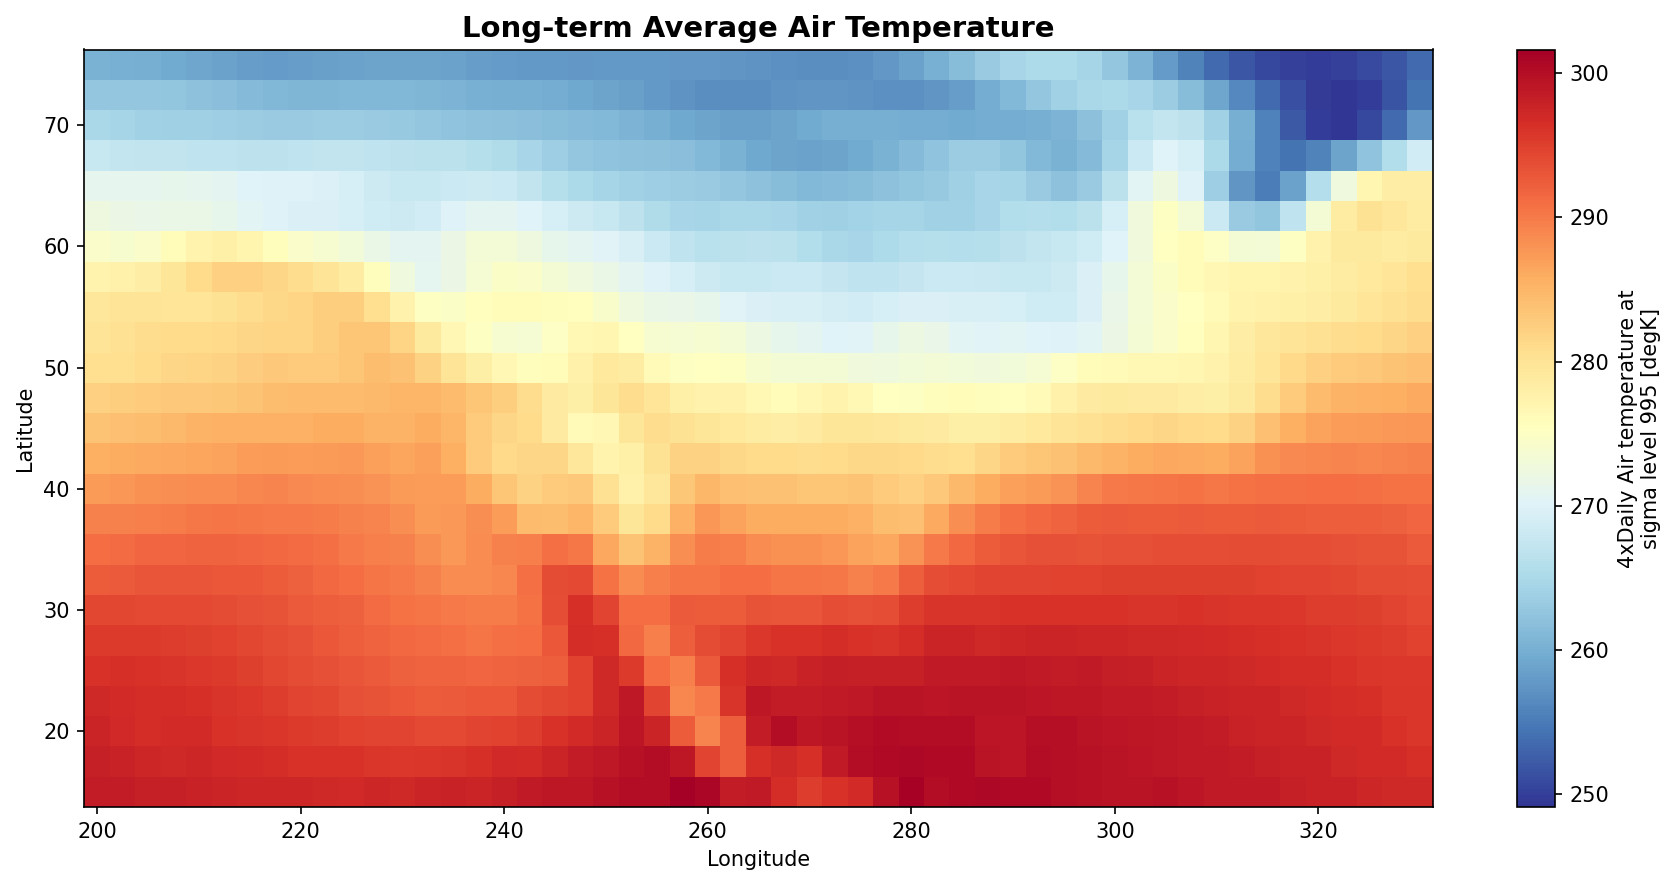

In [16]:
# Create a map of long-term average temperature
fig, ax = plt.subplots(figsize=(12, 6))
mean_temperature.plot(ax=ax, cmap="RdYlBu_r", add_colorbar=True)
plt.title("Long-term Average Air Temperature", fontsize=14, fontweight="bold")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

### Customizing Spatial Plots

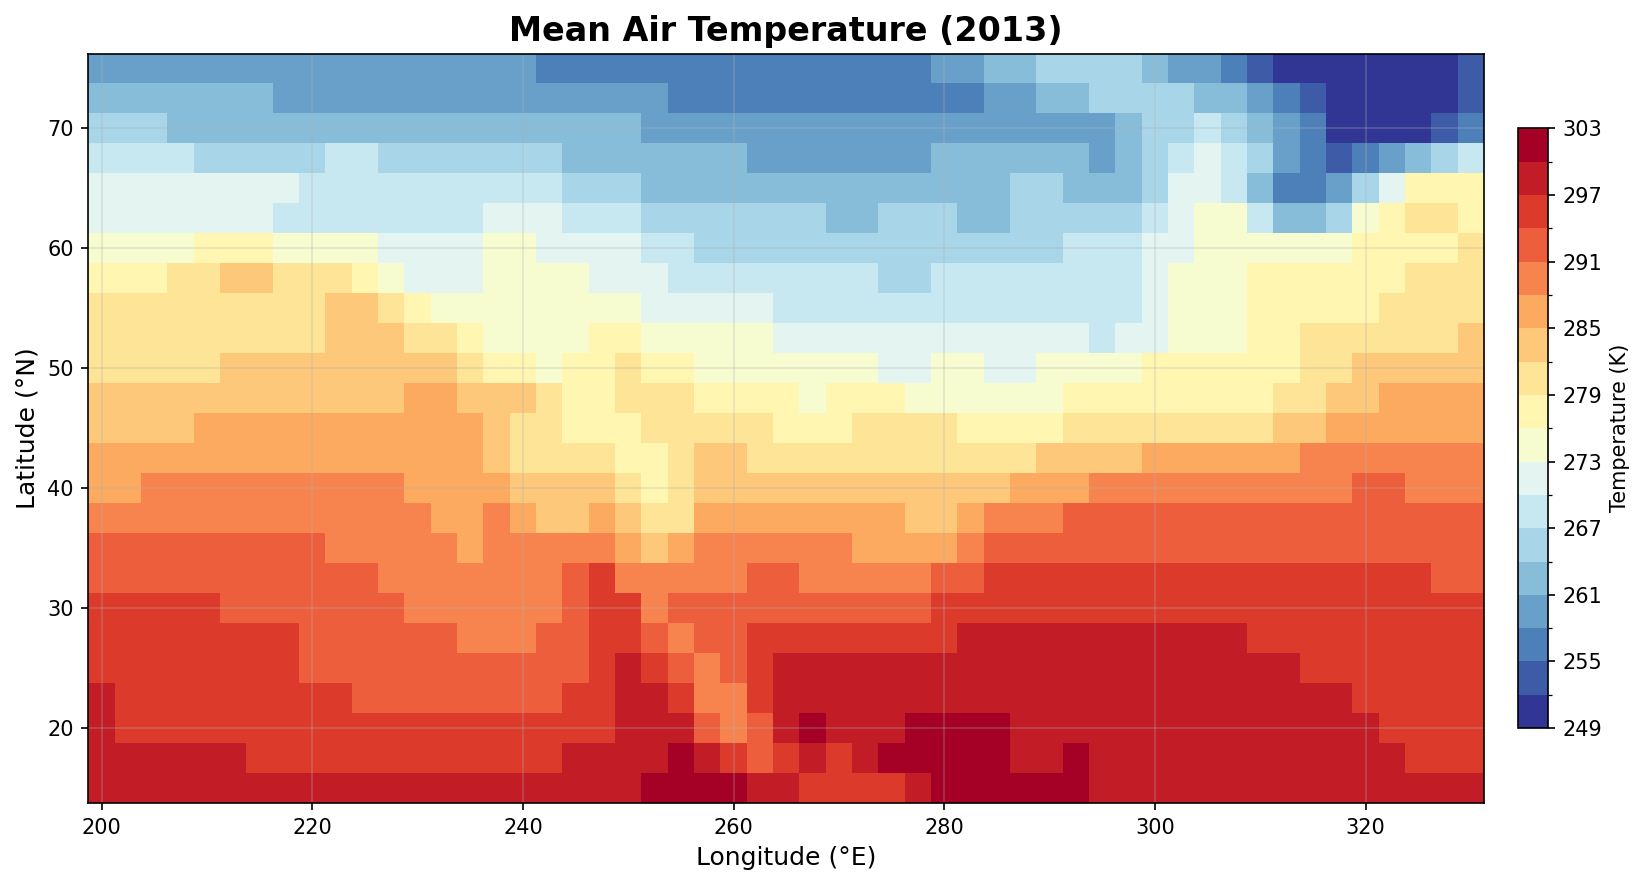

In [17]:
# Create a more customized visualization
fig, ax = plt.subplots(figsize=(12, 6))
plot = mean_temperature.plot(
    ax=ax,
    cmap="RdYlBu_r",
    levels=20,  # Number of contour levels
    add_colorbar=True,
    cbar_kwargs={"label": "Temperature (K)", "shrink": 0.8, "pad": 0.02},
)
plt.title("Mean Air Temperature (2013)", fontsize=16, fontweight="bold")
plt.xlabel("Longitude (°E)", fontsize=12)
plt.ylabel("Latitude (°N)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Time Series Visualization

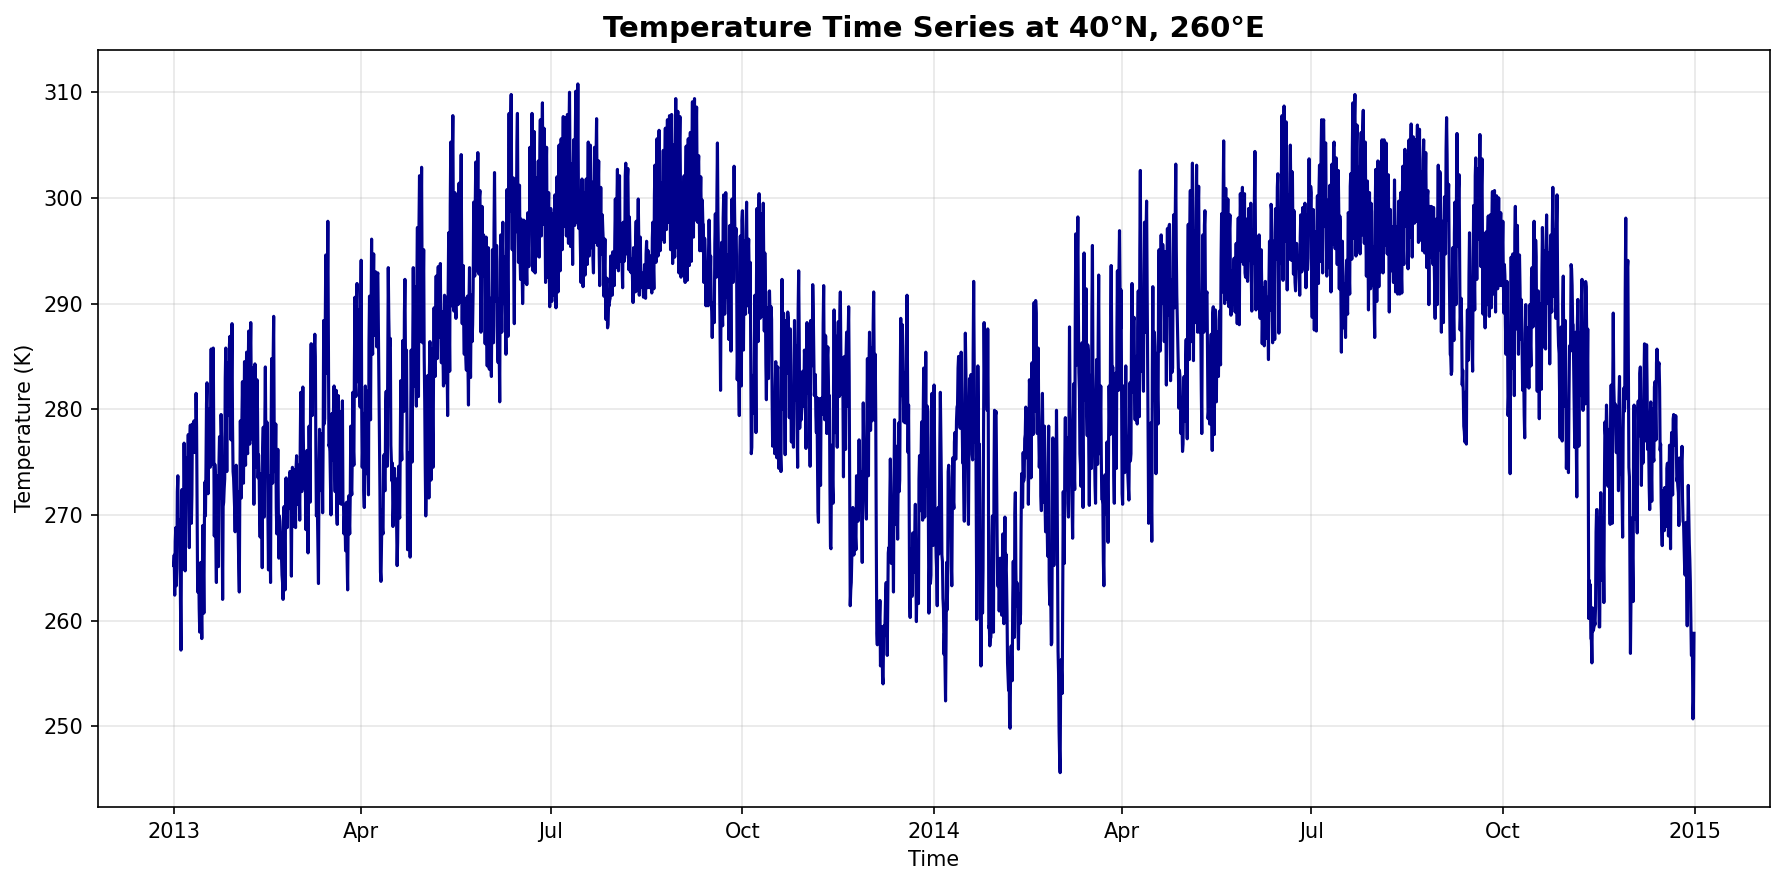

In [18]:
# Select and plot time series for a specific location
location_ts = temperature.sel(lat=40.0, lon=260.0)

fig, ax = plt.subplots(figsize=(12, 6))
location_ts.plot(ax=ax, linewidth=1.5, color="darkblue")
plt.title("Temperature Time Series at 40°N, 260°E", fontsize=14, fontweight="bold")
plt.xlabel("Time")
plt.ylabel("Temperature (K)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Working with Datasets: Multiple Variables

### Exploring Dataset Structure

In [19]:
# Examine all variables in the dataset
print("Data variables in the dataset:")
for var_name, var_info in ds.data_vars.items():
    print(f"  {var_name}: {var_info.dims}, shape {var_info.shape}")

print(f"\nShared coordinates: {list(ds.coords.keys())}")
print(f"Global attributes: {len(ds.attrs)} metadata items")

Data variables in the dataset:
  air: ('time', 'lat', 'lon'), shape (2920, 25, 53)

Shared coordinates: ['lat', 'lon', 'time']
Global attributes: 5 metadata items


### Dataset-Level Operations

In [20]:
# Calculate temporal statistics for all variables in the dataset
dataset_means = ds.mean(dim="time")
dataset_means

<xarray.Dataset> Size: 11kB
Dimensions:  (lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
Data variables:
    air      (lat, lon) float64 11kB 260.4 260.2 259.9 ... 297.3 297.3 297.3
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

## The Power of Label-Based Operations

### The NumPy Approach: Index-Based Selection

In [21]:
# Extract raw arrays and coordinates
lat_values = ds.air.lat.values
lon_values = ds.air.lon.values
temp_values = ds.air.values

print(f"Data shape: {temp_values.shape}")
print("To plot the first time step, you need to remember:")
print("- Time is dimension 0")
print("- Latitude is dimension 1")
print("- Longitude is dimension 2")

Data shape: (2920, 25, 53)
To plot the first time step, you need to remember:
- Time is dimension 0
- Latitude is dimension 1
- Longitude is dimension 2


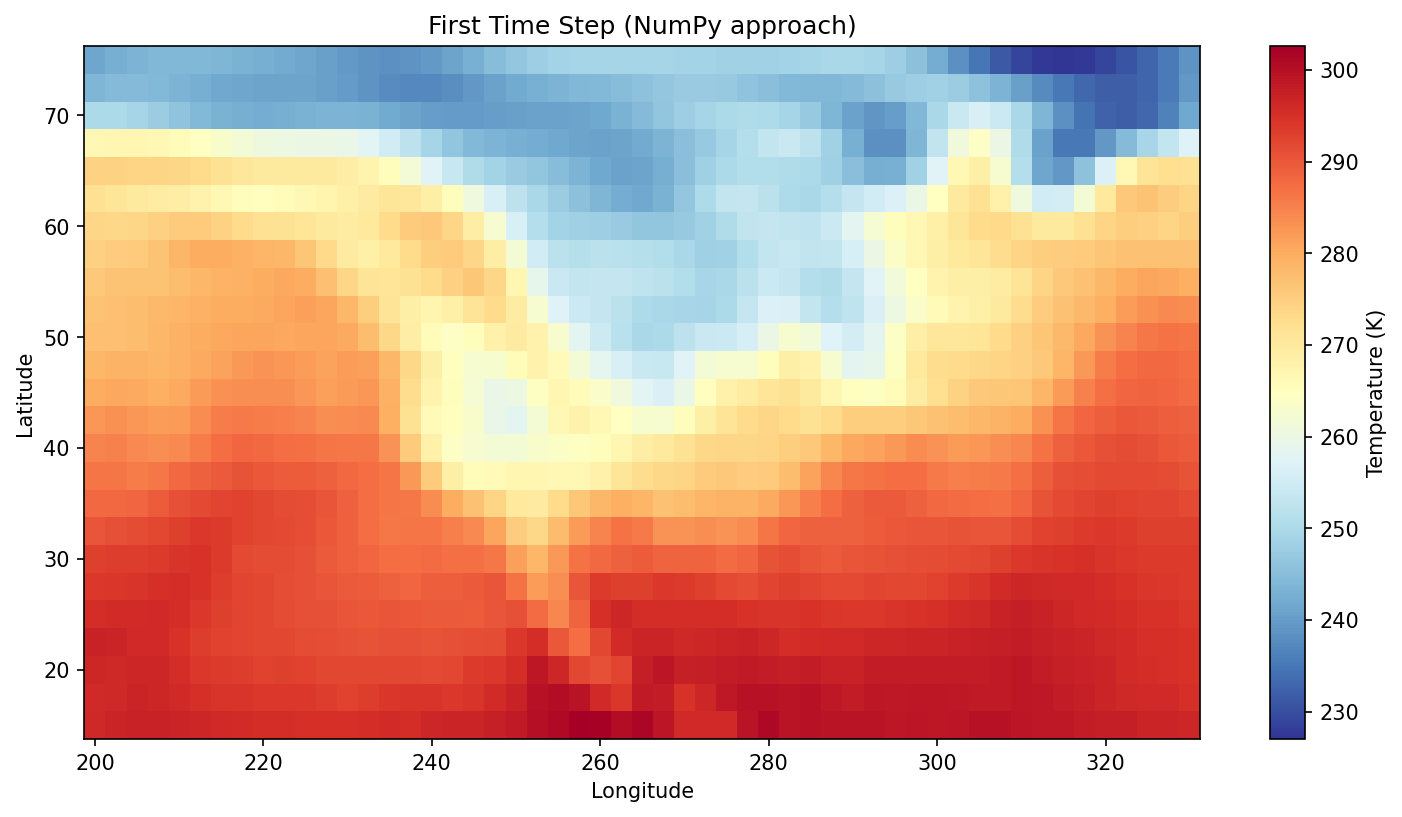

In [22]:
# Plot using NumPy approach - requires careful index management
fig, ax = plt.subplots(figsize=(12, 6))
im = ax.pcolormesh(lon_values, lat_values, temp_values[0, :, :], cmap="RdYlBu_r")
plt.colorbar(im, ax=ax, label="Temperature (K)")
plt.title("First Time Step (NumPy approach)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### The Xarray Approach: Label-Based Selection

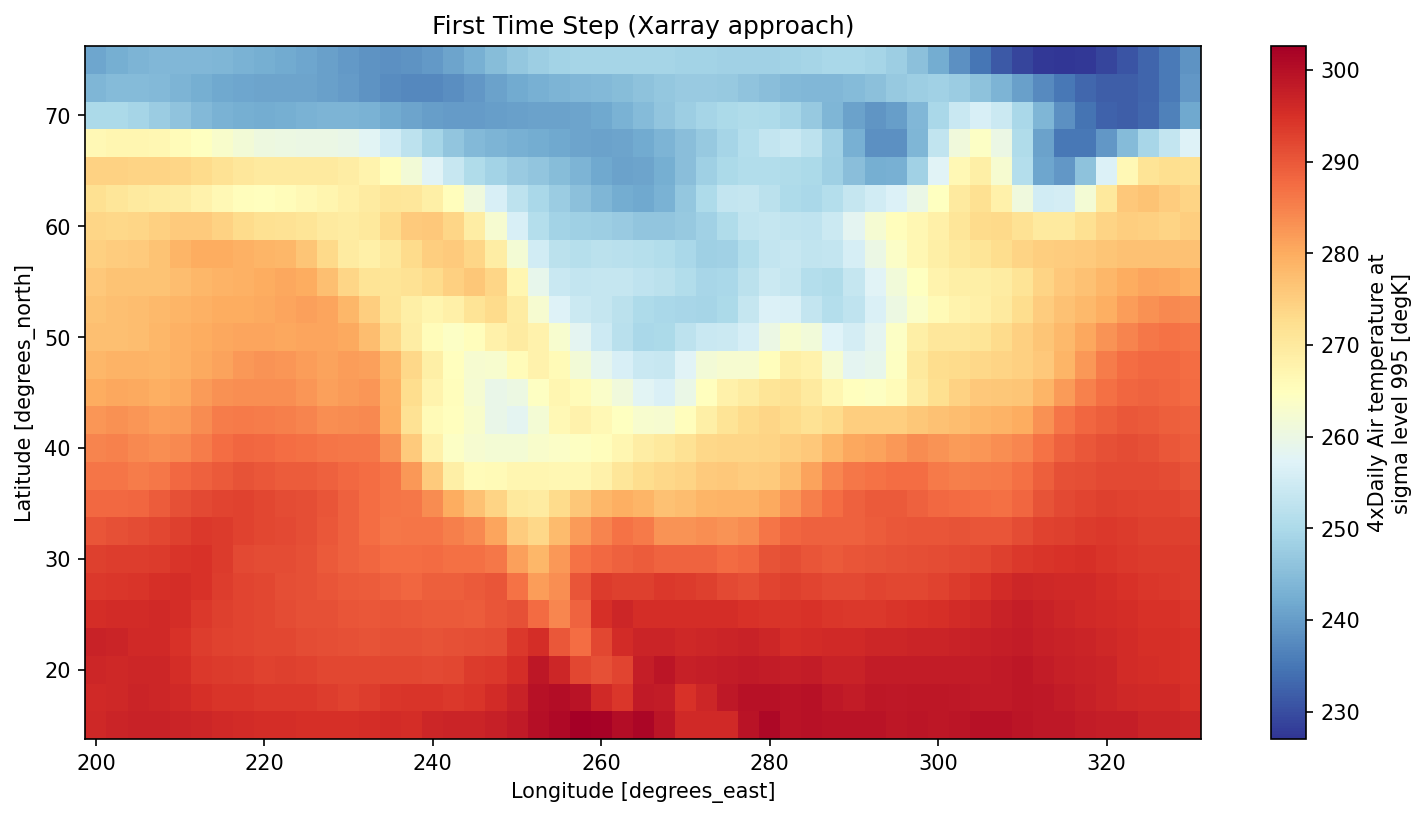

In [23]:
# Same result with Xarray - much more readable and less error-prone
ds.air.isel(time=0).plot(figsize=(12, 6), cmap="RdYlBu_r")
plt.title("First Time Step (Xarray approach)")
plt.show()

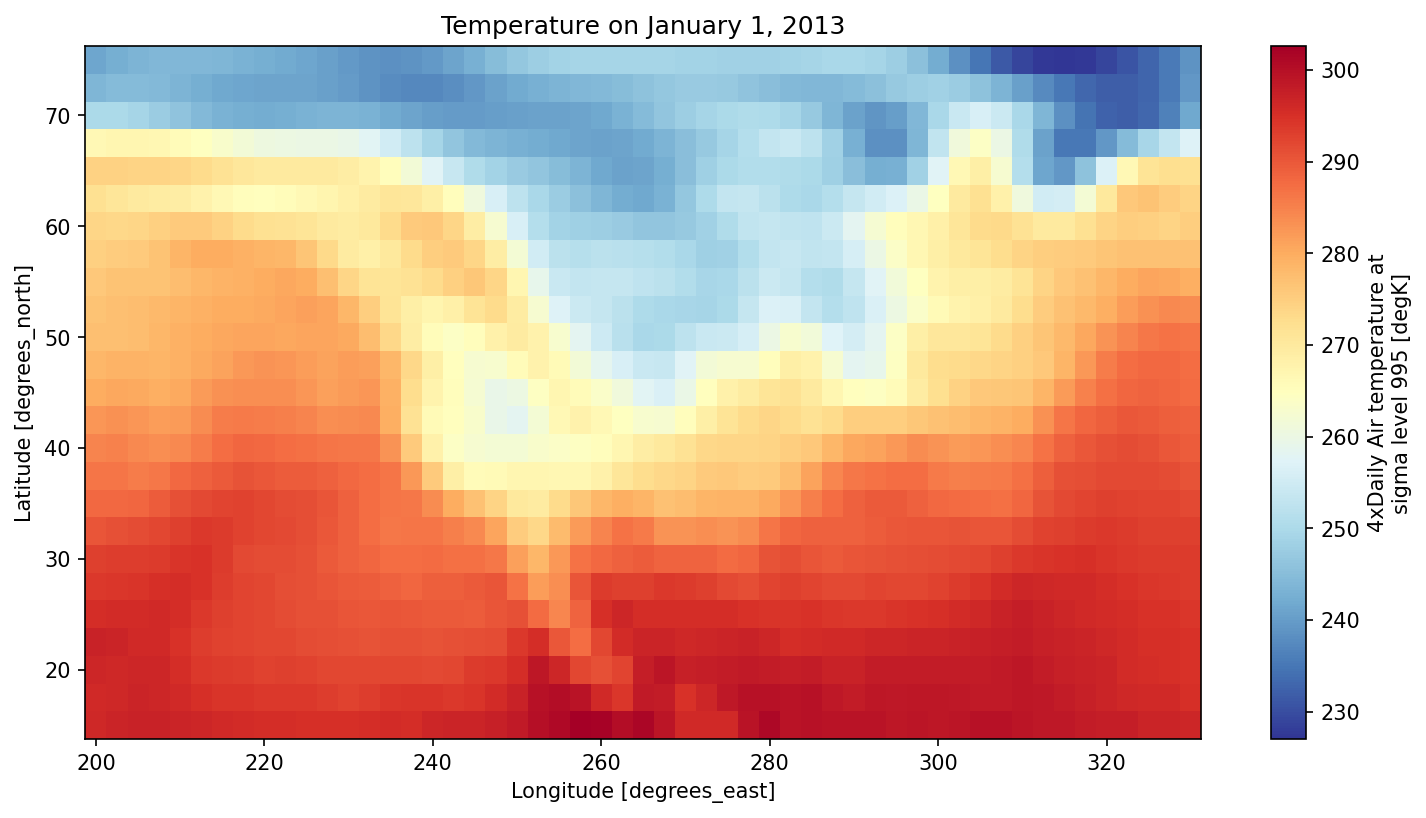

In [24]:
# Select by actual date rather than array index
ds.air.sel(time="2013-01-01T00:00:00").plot(figsize=(12, 6), cmap="RdYlBu_r")
plt.title("Temperature on January 1, 2013")
plt.show()

## Advanced Indexing Techniques

### Position-Based vs. Label-Based Indexing

In [25]:
# Position-based indexing using isel() - useful for systematic sampling
first_last_times = ds.air.isel(time=[0, -1])  # First and last time steps
print(f"Selected time steps: {first_last_times.time.values}")

# Label-based indexing using sel() - useful for specific values
specific_months = ds.air.sel(time=slice("2013-05", "2013-07"))
print(f"May-July 2013 contains {len(specific_months.time)} time steps")

Selected time steps: ['2013-01-01T00:00:00.000000000' '2014-12-31T18:00:00.000000000']
May-July 2013 contains 368 time steps


### Boolean Indexing and Conditional Selection

In [26]:
# Find locations where average temperature exceeds a threshold
warm_locations = mean_temperature.where(mean_temperature > 280)  # 280 K ≈ 7°C
warm_count = warm_locations.count()
print(f"Number of grid points with mean temperature > 280 K: {warm_count.values}")

# Find time periods when spatial average temperature was unusually high
temp_threshold = spatial_mean.quantile(0.9)  # 90th percentile
warm_periods = spatial_mean.where(spatial_mean > temp_threshold, drop=True)
print(f"Number of exceptionally warm time periods: {len(warm_periods)}")

Number of grid points with mean temperature > 280 K: 747
Number of exceptionally warm time periods: 292


## High-Level Computational Operations

### GroupBy Operations for Temporal Analysis

In [27]:
# Calculate seasonal climatology
seasonal_means = ds.air.groupby("time.season").mean()
print("Seasonal temperature patterns:")
seasonal_means

Seasonal temperature patterns:


<xarray.DataArray 'air' (season: 4, lat: 25, lon: 53)> Size: 42kB
247.0 247.0 246.7 246.3 245.6 244.9 ... 299.6 299.6 299.7 299.4 299.4 299.5
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * season   (season) object 32B 'DJF' 'JJA' 'MAM' 'SON'
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

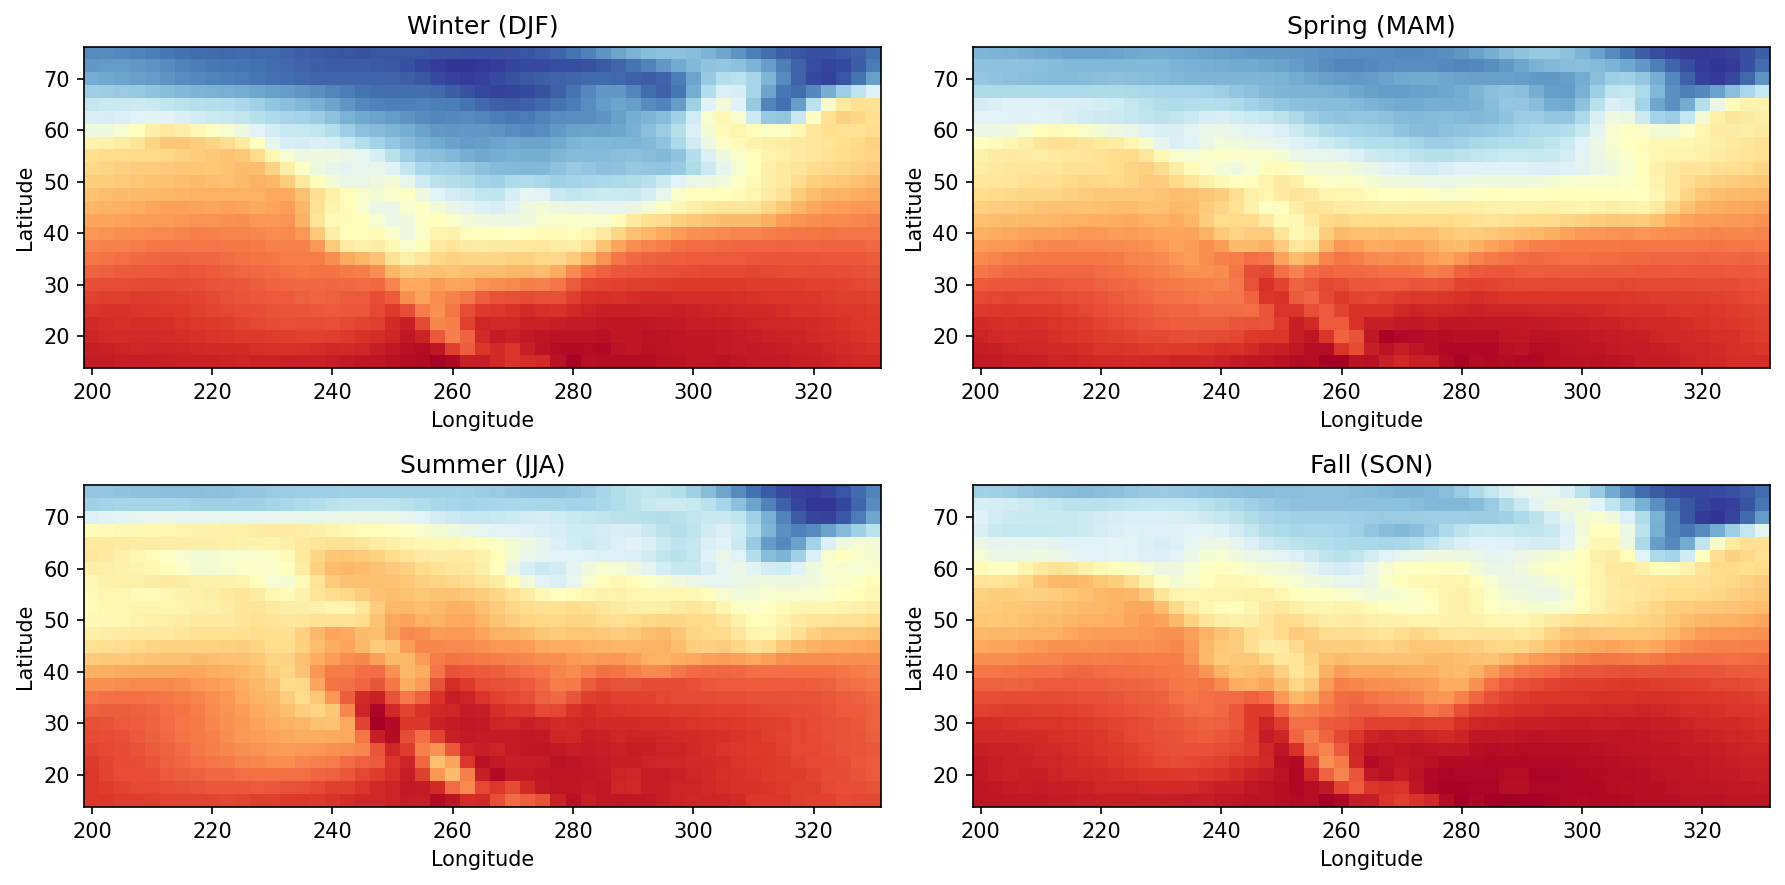

In [28]:
# Visualize seasonal patterns
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
seasons = ["DJF", "MAM", "JJA", "SON"]
season_names = ["Winter", "Spring", "Summer", "Fall"]

for i, (season, name) in enumerate(zip(seasons, season_names)):
    ax = axes[i // 2, i % 2]
    seasonal_means.sel(season=season).plot(ax=ax, cmap="RdYlBu_r", add_colorbar=False)
    ax.set_title(f"{name} ({season})")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()

### Rolling Window Operations

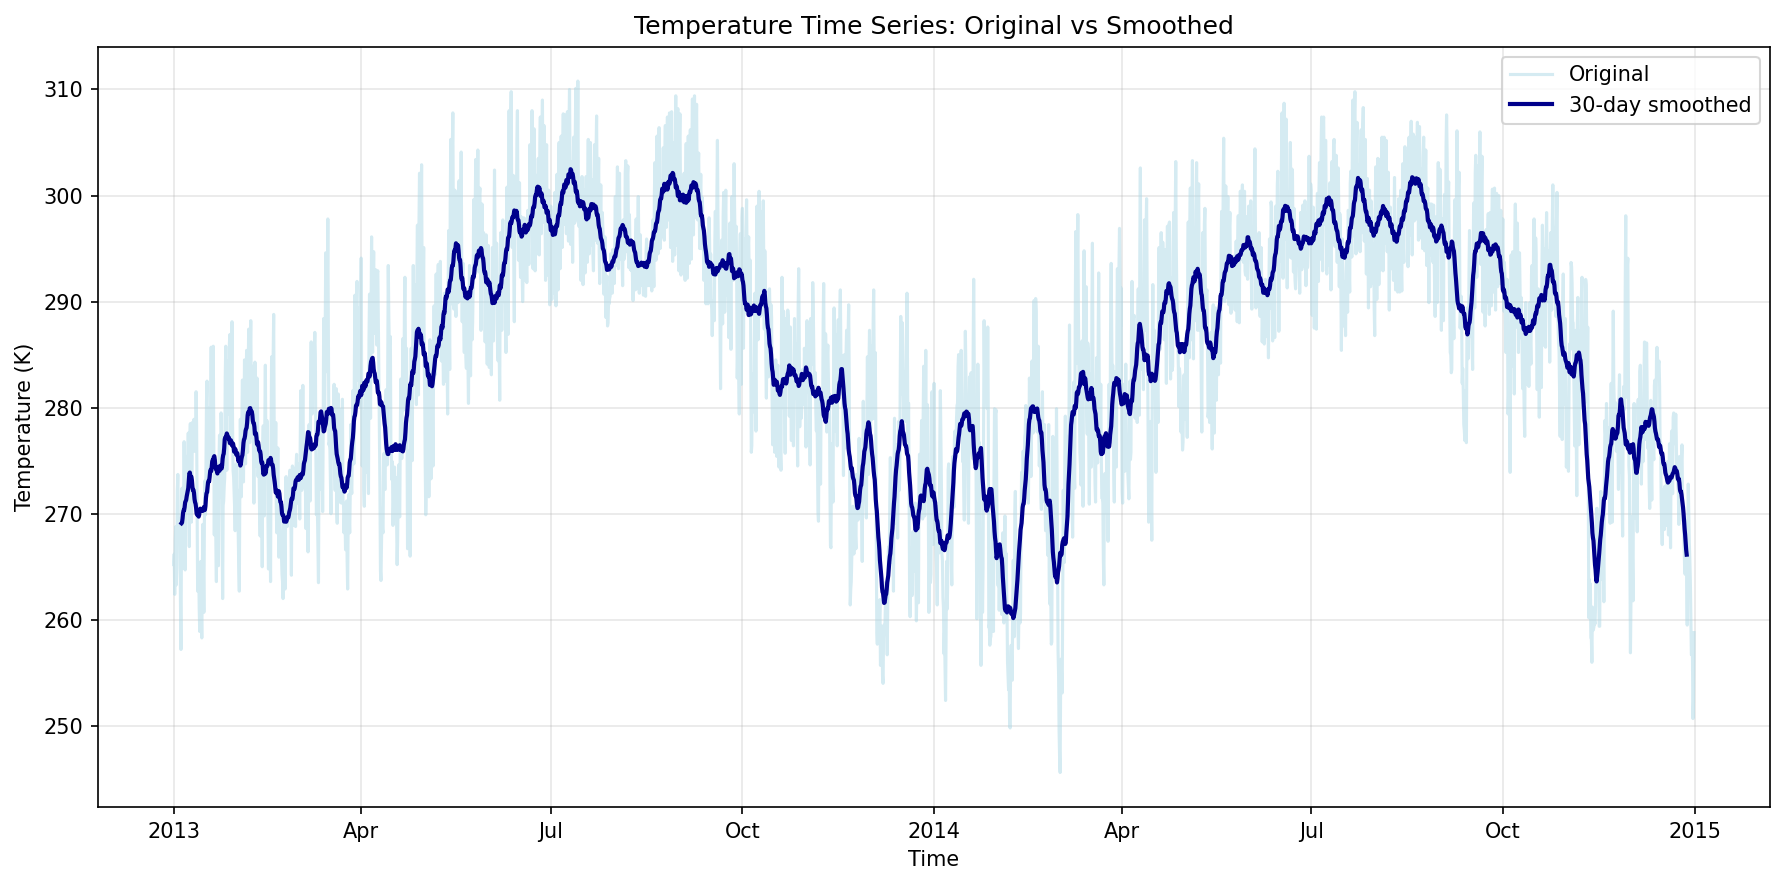

In [29]:
# Create a smoothed time series using a rolling window
location_data = temperature.sel(lat=40.0, lon=260.0)

fig, ax = plt.subplots(figsize=(12, 6))

# Plot original data
location_data.plot(ax=ax, alpha=0.5, label="Original", color="lightblue")

# Plot smoothed data using a 30-day rolling window
smoothed_data = location_data.rolling(time=30, center=True).mean()
smoothed_data.plot(ax=ax, label="30-day smoothed", color="darkblue", linewidth=2)

plt.title("Temperature Time Series: Original vs Smoothed")
plt.xlabel("Time")
plt.ylabel("Temperature (K)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Weighted Operations

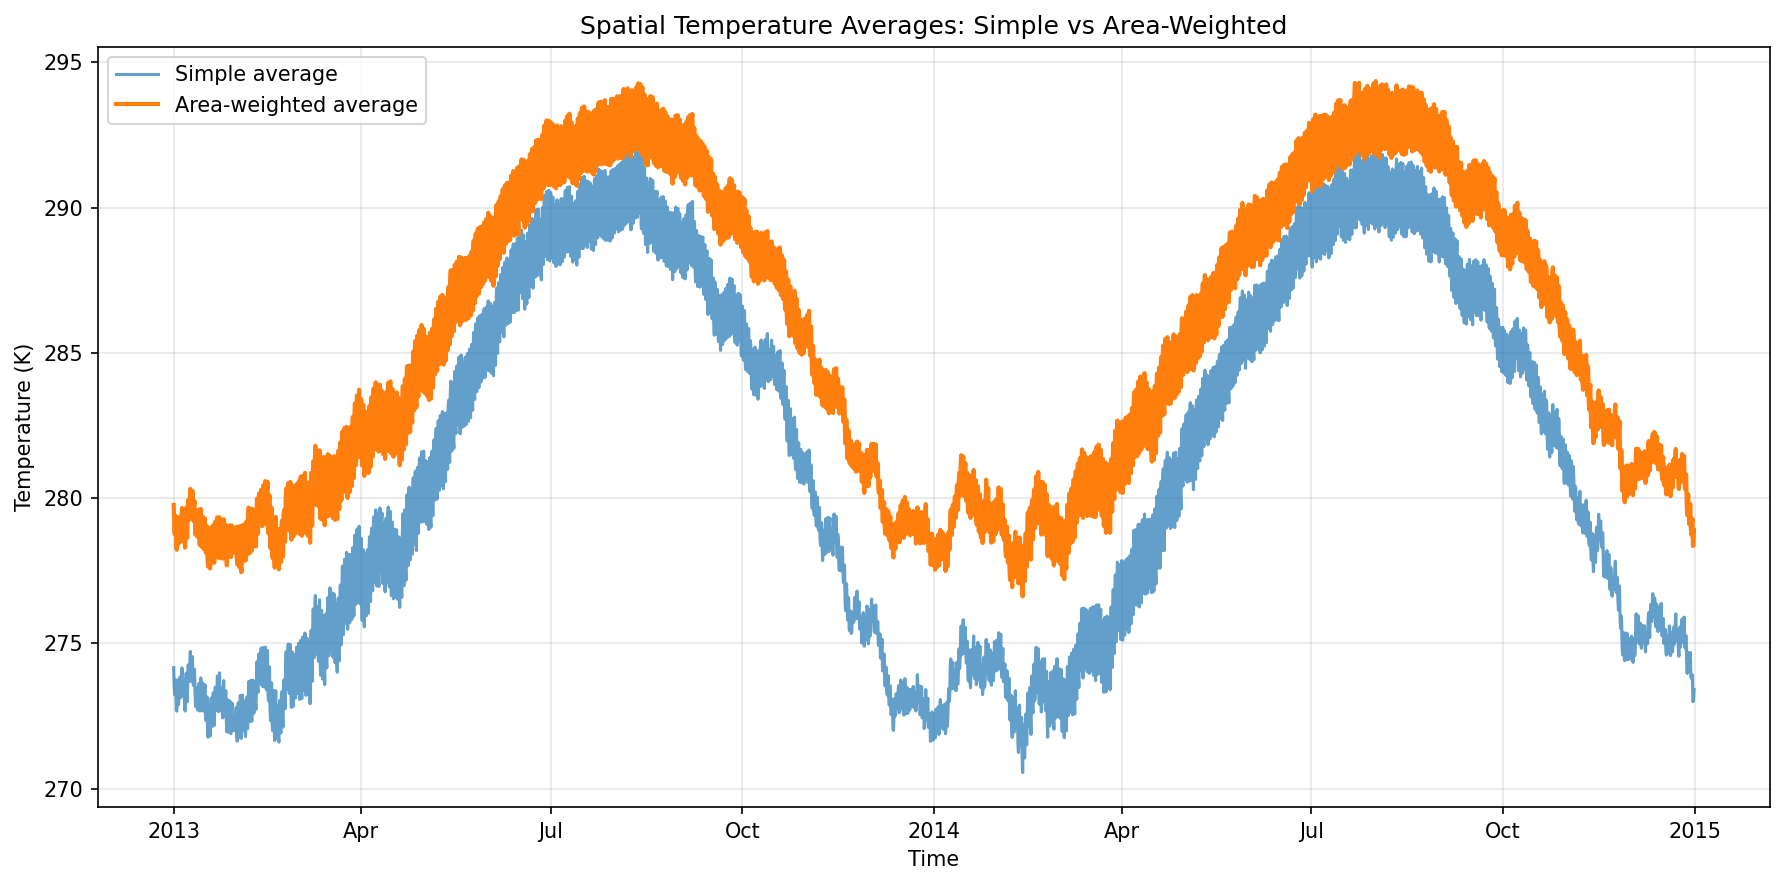

In [30]:
# Create simple area weights (this is a simplified example)
# In practice, you would use proper latitude-based area weighting
lat_weights = np.cos(np.radians(ds.air.lat))
area_weighted_mean = ds.air.weighted(lat_weights).mean(dim=["lat", "lon"])

# Compare simple vs area-weighted spatial averages
fig, ax = plt.subplots(figsize=(12, 6))
spatial_mean.plot(ax=ax, label="Simple average", alpha=0.7)
area_weighted_mean.plot(ax=ax, label="Area-weighted average", linewidth=2)
plt.title("Spatial Temperature Averages: Simple vs Area-Weighted")
plt.xlabel("Time")
plt.ylabel("Temperature (K)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Data Input and Output

### Understanding NetCDF Format

### Writing Data to NetCDF

In [31]:
# Prepare data for saving (ensure proper data types)
output_ds = ds.copy()
output_ds["air"] = output_ds["air"].astype("float32")  # Reduce file size

# Add processing metadata
output_ds.attrs["processing_date"] = str(np.datetime64("now"))
output_ds.attrs["created_by"] = "GIS Pro"

# Save to NetCDF file
output_ds.to_netcdf("processed_air_temperature.nc")
print("Dataset saved to processed_air_temperature.nc")

Dataset saved to processed_air_temperature.nc


### Reading Data from NetCDF

In [32]:
# Load the saved dataset
reloaded_ds = xr.open_dataset("processed_air_temperature.nc")
print("Successfully reloaded dataset:")
print(f"Variables: {list(reloaded_ds.data_vars.keys())}")
print(f"Processing date: {reloaded_ds.attrs.get('processing_date', 'Not specified')}")
print(f"Data matches original: {reloaded_ds.air.equals(ds.air.astype('float32'))}")

Successfully reloaded dataset:
Variables: ['air']
Processing date: 2025-10-27T18:15:06
Data matches original: True


## Key Takeaways

## Further Reading

## Exercises

### Exercise 1: Exploring a New Dataset

In [33]:
# Load the dataset
ds = xr.tutorial.open_dataset('rasm')
# ds

air_temp = ds.Tair

print("Data shape:", air_temp.values.shape)
print("Data type:", air_temp.values.dtype)
print("First few values:", air_temp.values.flat[:5])

print(f'Dimensions: {air_temp.dims}')
print(f'Dimension sizes: {air_temp.sizes}')


print("Attributes:")
for key, value in air_temp.attrs.items():
    print(f"  {key}: {value}")

print("Coordinates:")
for name, coord in air_temp.coords.items():
    print(f"  {name}: {coord.values[:3]}... (showing first 3 values)")





Data shape: (36, 205, 275)
Data type: float64
First few values: [nan nan nan nan nan]
Dimensions: ('time', 'y', 'x')
Dimension sizes: Frozen({'time': 36, 'y': 205, 'x': 275})
Attributes:
  units: C
  long_name: Surface air temperature
  type_preferred: double
  time_rep: instantaneous
Coordinates:
  time: [cftime.DatetimeNoLeap(1980, 9, 16, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1980, 10, 17, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1980, 11, 16, 12, 0, 0, 0, has_year_zero=True)]... (showing first 3 values)
  xc: [[189.22293223 189.38990916 ... 294.0279241  294.27439931]
 [188.96836986 189.13470591 ... 294.30444387 294.55065969]
 [188.71234264 188.87800731 ... 294.58337453 294.8292928 ]]... (showing first 3 values)
  yc: [[16.53498637 16.7784556  ... 27.11811045 26.87289026]
 [16.69397341 16.93865381 ... 27.33821848 27.0913656 ]
 [16.85219179 17.09808909 ... 27.55764558 27.30915621]]... (showing first 3 values)


### Exercise 2: Data Selection and Indexing

In [34]:
"""THIS IS NOT WORKING.... it is a 2D indexed array instead of a 1D lat/long array so the methods of working
on it are completely different. This has made it difficult to move on. I do think I understand what is going on though
I feel confident in being able to do this later if needed."""
target_lat = 70.0

yc = air_temp.yc.values

indicies = np.unravel_index(np.abs(yc - target_lat).argmin(), yc.shape)
y_idx, x_idx = indicies

point_data = air_temp.sel(time='1980-07-01', method='nearest').isel(y=y_idx, x=x_idx)
point_data


TypeError: '<' not supported between instances of 'str' and 'cftime._cftime.DatetimeNoLeap'

### Exercise 3: Performing Arithmetic Operations

### Exercise 4: GroupBy and Temporal Analysis

### Exercise 5: Data Storage and Retrieval